In [49]:
import pandas as pd

df = pd.read_csv("data/ncr_ride_bookings_cleaned.csv")

# Quick look
print(df.shape)
print(df.info())



(150000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Booking ID                         150000 non-null  object 
 1   Booking Status                     150000 non-null  object 
 2   Customer ID                        150000 non-null  object 
 3   Vehicle Type                       150000 non-null  object 
 4   Pickup Location                    150000 non-null  object 
 5   Drop Location                      150000 non-null  object 
 6   Avg VTAT                           150000 non-null  float64
 7   Avg CTAT                           150000 non-null  float64
 8   Cancelled Rides by Customer        150000 non-null  int64  
 9   Reason for cancelling by Customer  150000 non-null  object 
 10  Cancelled Rides by Driver          150000 non-null  int64  
 11  Driver Cancellation Reason

In [30]:
# Numeric columns summary
print(df.describe())

# Categorical columns summary
for col in ['Booking Status', 'Vehicle Type', 'Payment Method']:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


            Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  150000.000000  150000.000000                150000.000000   
mean        7.864407      19.821753                     0.070000   
std         4.230640      15.452834                     0.255148   
min         0.000000       0.000000                     0.000000   
25%         4.700000       0.000000                     0.000000   
50%         7.800000      22.000000                     0.000000   
75%        11.000000      32.900000                     0.000000   
max        20.000000      45.000000                     1.000000   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count              150000.000000     150000.000000  150000.000000   
mean                    0.180000          0.060000     345.641220   
std                     0.384189          0.237488     403.423487   
min                     0.000000          0.000000       0.000000   
25%                     0.000000          

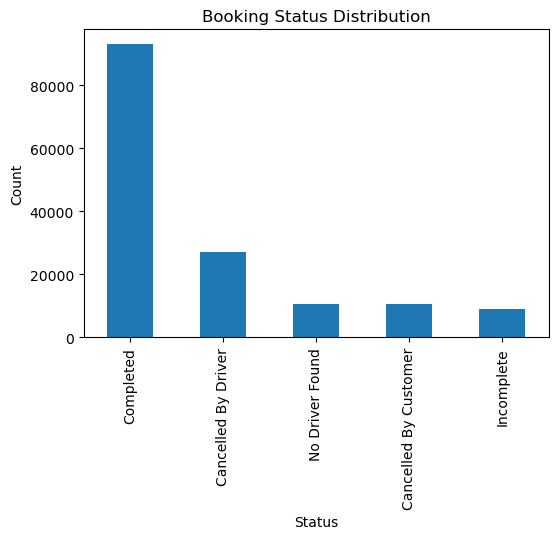

In [31]:
import matplotlib.pyplot as plt

df['Booking Status'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


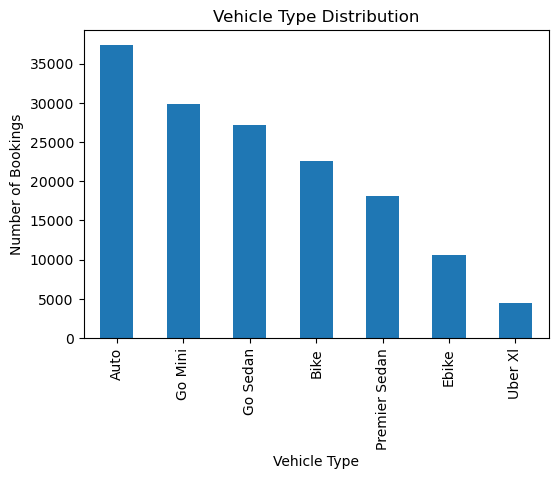

In [32]:
df['Vehicle Type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Bookings")
plt.show()


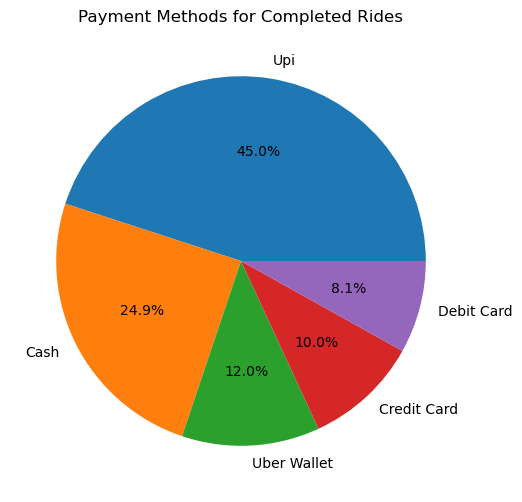

In [33]:
df_completed = df[df['Booking Status'] == "Completed"]

df_completed['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Methods for Completed Rides")
plt.ylabel("")
plt.show()


In [34]:
df_completed[['Booking Value', 'Ride Distance']].describe()


,Booking Value,Ride Distance
count,93000.000000,93000.000000
mean,508.178215,26.000493
std,396.058769,13.824176
min,50.000000,2.000000
25%,234.000000,14.100000
50%,414.000000,26.020000
75%,689.000000,37.942500
max,4277.000000,50.000000


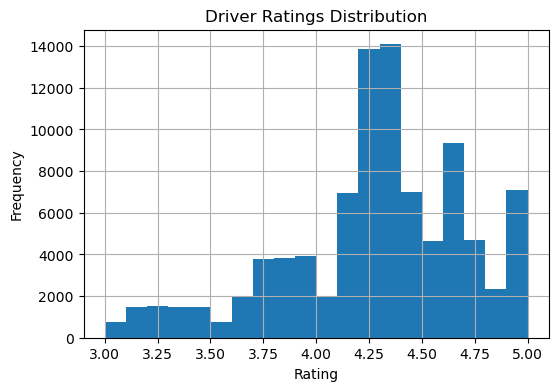

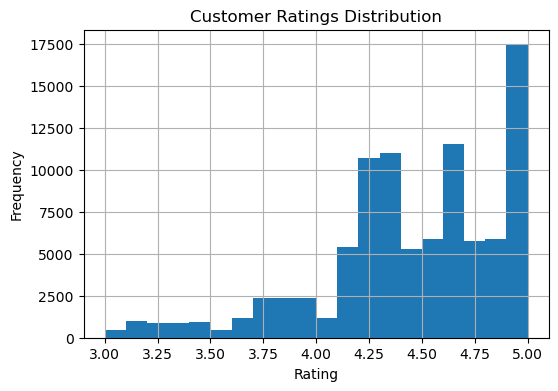

In [35]:
df_completed['Driver Ratings'].replace("Not Rated", pd.NA).astype(float).hist(bins=20, figsize=(6,4))
plt.title("Driver Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

df_completed['Customer Rating'].replace("Not Rated", pd.NA).astype(float).hist(bins=20, figsize=(6,4))
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


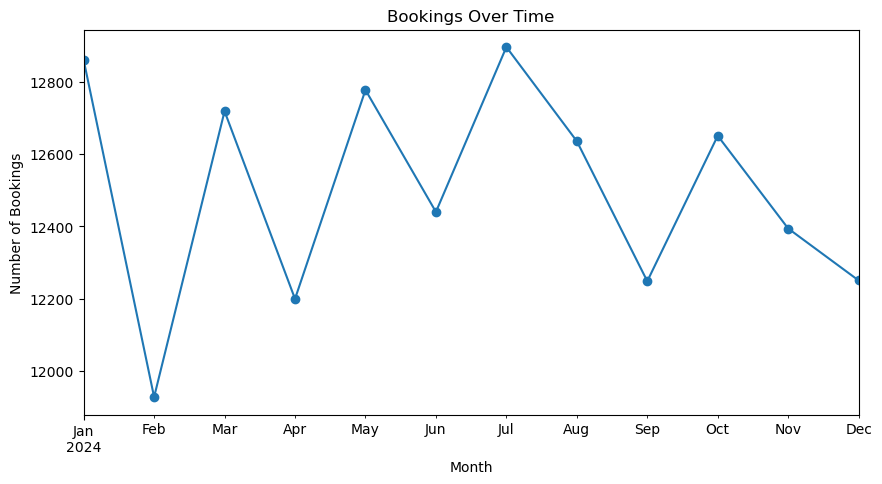

In [45]:
# Convert datetime if needed
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Bookings per month
df['Month'] = df['Datetime'].dt.to_period('M')
df.groupby('Month').size().plot(kind='line', marker='o', figsize=(10,5))
plt.title("Bookings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()




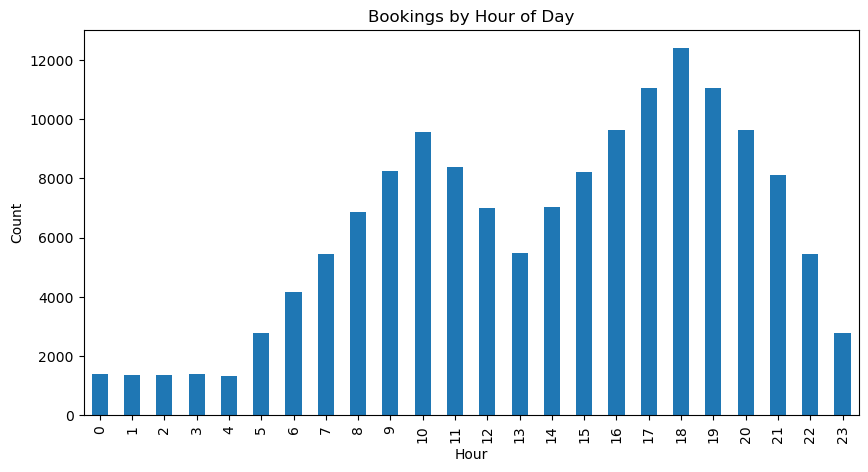

In [44]:
# Bookings per hour of day

df['Hour'] = df['Datetime'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Bookings by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

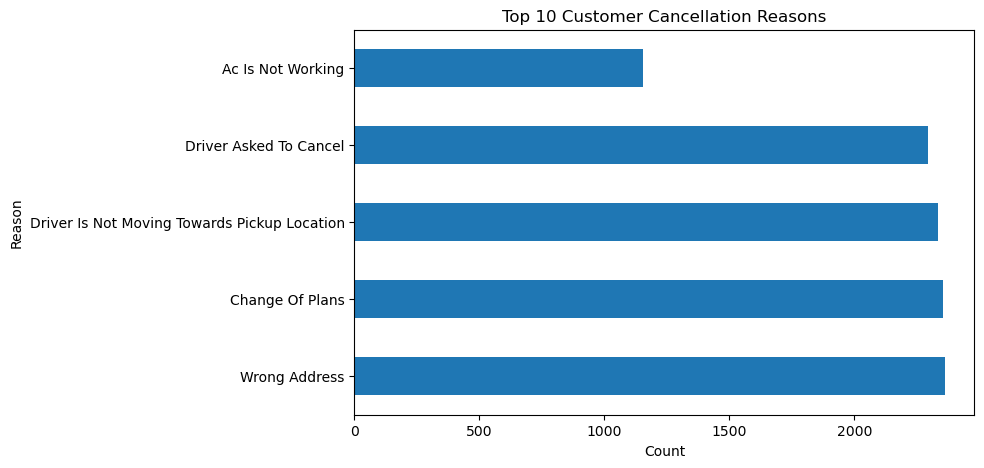

In [37]:

# --- Customer Cancellations ---
df_customer_cancel = df[df['Cancelled Rides by Customer'] > 0]

df_customer_cancel['Reason for cancelling by Customer'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Customer Cancellation Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()



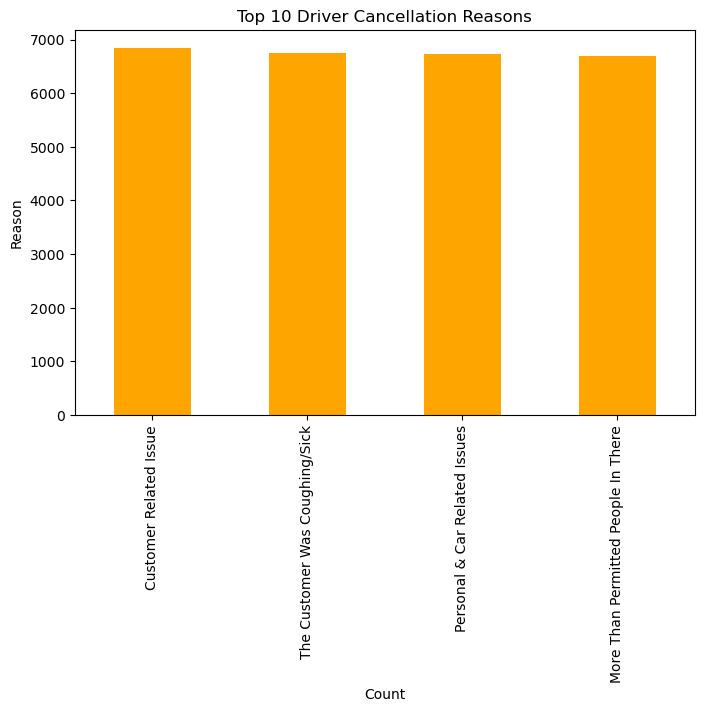

In [46]:
# --- Driver Cancellations ---
df_driver_cancel = df[df['Cancelled Rides by Driver'] > 0]

df_driver_cancel['Driver Cancellation Reason'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color="orange")
plt.title("Top 10 Driver Cancellation Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()



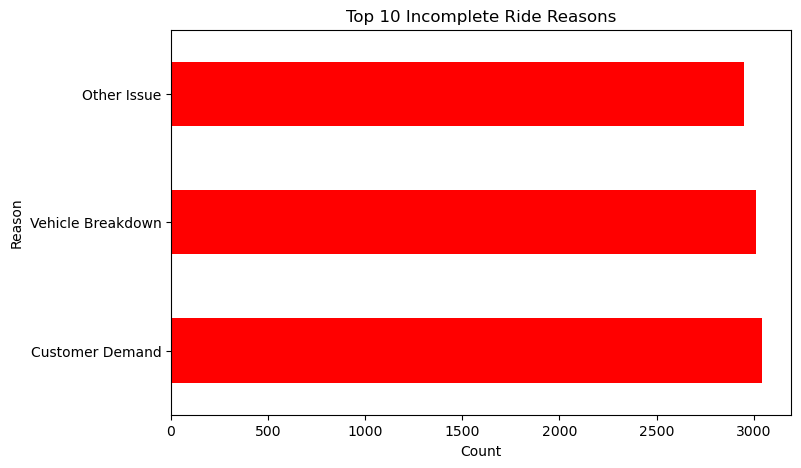

In [39]:
# --- Incomplete Rides ---
df_incomplete = df[df['Incomplete Rides'] > 0]

df_incomplete['Incomplete Rides Reason'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color="red")
plt.title("Top 10 Incomplete Ride Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

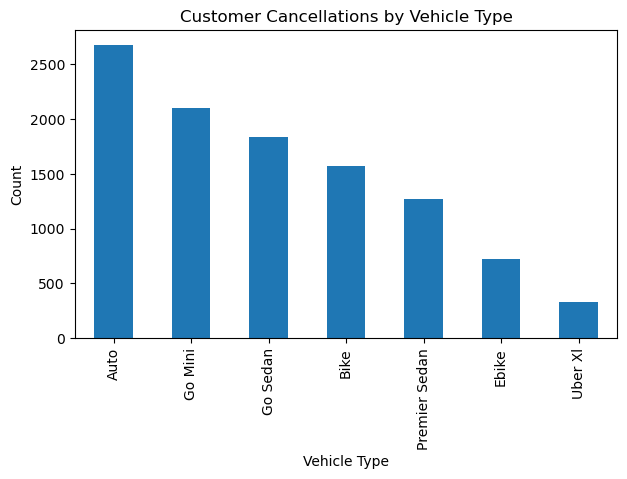

In [40]:
# Customer cancellations per vehicle type
df_customer_cancel.groupby('Vehicle Type').size().sort_values(ascending=False).plot(kind='bar', figsize=(7,4))
plt.title("Customer Cancellations by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

# Driver cancellations per vehicle type


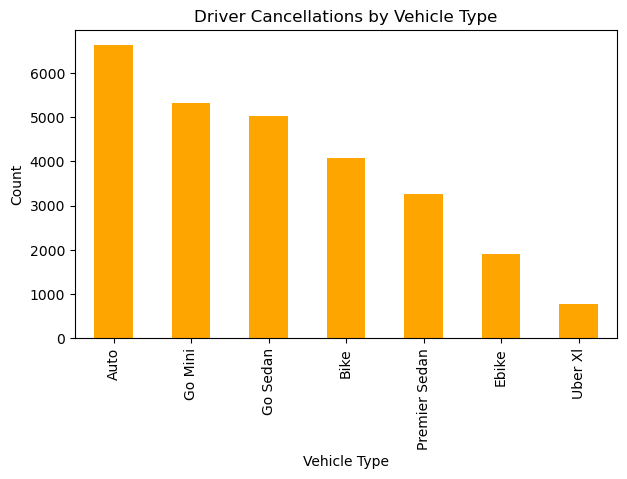

In [41]:
df_driver_cancel.groupby('Vehicle Type').size().sort_values(ascending=False).plot(kind='bar', figsize=(7,4), color="orange")
plt.title("Driver Cancellations by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21532\3687575303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_cancel['Hour'] = pd.to_datetime(df_customer_cancel['Datetime']).dt.hour


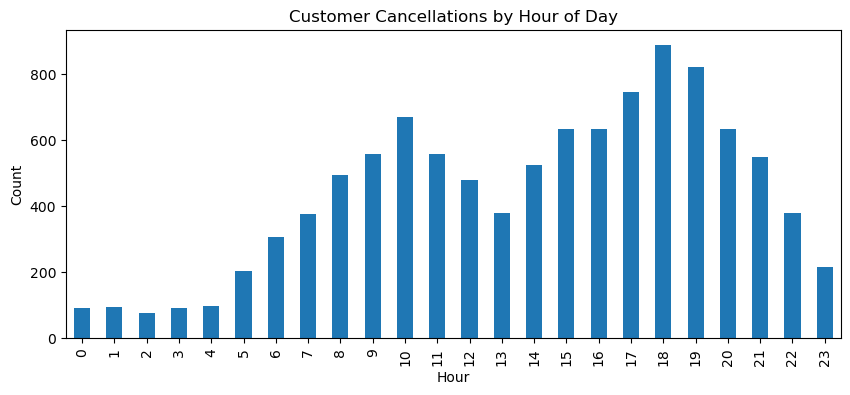

In [42]:
# Customer cancellations by hour
df_customer_cancel['Hour'] = pd.to_datetime(df_customer_cancel['Datetime']).dt.hour
df_customer_cancel['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Customer Cancellations by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21532\3959728843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_driver_cancel['Hour'] = pd.to_datetime(df_driver_cancel['Datetime']).dt.hour


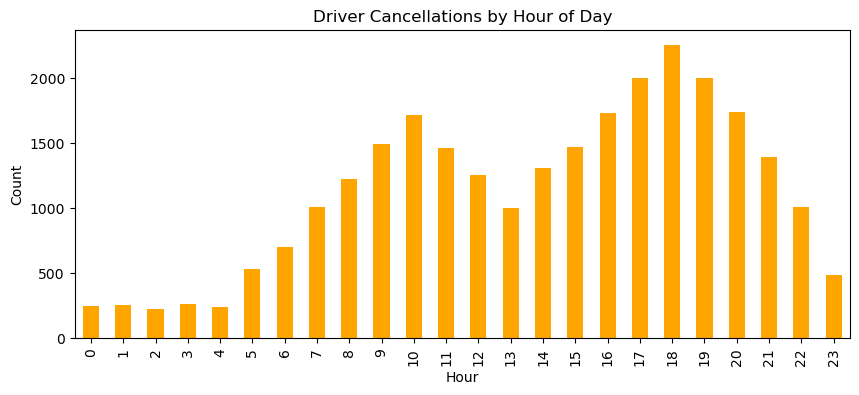

In [43]:
df_driver_cancel['Hour'] = pd.to_datetime(df_driver_cancel['Datetime']).dt.hour
df_driver_cancel['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), color="orange")
plt.title("Driver Cancellations by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

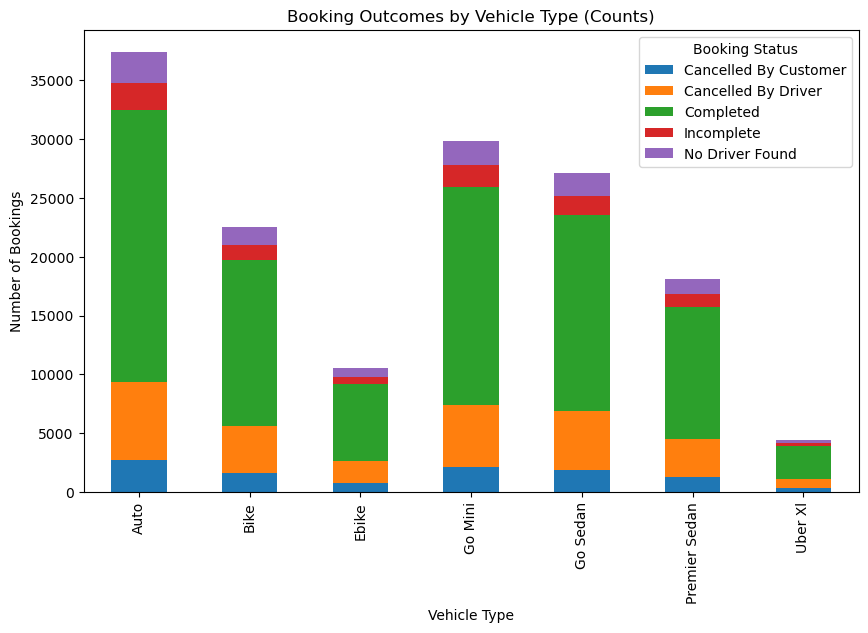

In [48]:

# Count booking outcomes by vehicle type
status_by_vehicle = df.groupby(['Vehicle Type', 'Booking Status']).size().unstack(fill_value=0)

# Normalize to percentages (optional)
status_by_vehicle_pct = status_by_vehicle.div(status_by_vehicle.sum(axis=1), axis=0) * 100

# --- Absolute counts ---
status_by_vehicle.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Booking Outcomes by Vehicle Type (Counts)")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Bookings")
plt.legend(title="Booking Status")
plt.show()


